In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
df1011 = pd.read_csv('2010-11-data_sa_crime.csv')
df1112 = pd.read_excel('2011-12-data_sa_crime.xlsx')
df1213 = pd.read_csv('2012-13-data_sa_crime.csv')
df1314 = pd.read_csv('2013-14-data_sa_crime.csv')
df1415 = pd.read_csv('2014-15-data_sa_crime.csv')
df1516 = pd.read_csv('2015-16-data_sa_crime.csv')
df1617 = pd.read_csv('2016-17-data_sa_crime.csv')
df1718 = pd.read_csv('2017-18-data_sa_crime.csv')
df1819 = pd.read_csv('2018-19-data_sa_crime.csv')
df1920 = pd.read_csv('2019-20-fullyr-data_sa_crime.csv')
df2021 = pd.read_csv('2020-21_data_sa_crime.csv')
df2122 = pd.read_csv('2021-22-data-sa-crime-q1-q4.csv')
df22 = pd.read_csv('q1_2022-23_data_sa_crime.csv')

In [71]:
print(df1011.shape)
print(df1112.shape)
print(df1213.shape)
print(df1314.shape)
print(df1415.shape)
print(df1617.shape)
print(df1718.shape)
print(df1819.shape)
print(df1920.shape)
print(df2021.shape)
print(df2122.shape)
print(df22.shape)

(105297, 7)
(100028, 7)
(96404, 7)
(88793, 7)
(90272, 7)
(90683, 7)
(90656, 7)
(94938, 7)
(95702, 7)
(84949, 7)
(90843, 7)
(22744, 7)


In [72]:
df = pd.concat([df1011, df1112, df1213, df1314, df1415, df1516, df1617, df1718, df1819, df1920, df2021, df2122, df22], axis=0, ignore_index=True)

In [73]:
df.shape

(1144477, 7)

In [74]:
##df.to_csv('Total.csv', index = False)

In [75]:
df.tail()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
1144472,30/09/2022,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0
1144473,30/09/2022,YALATA,5690,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,3.0
1144474,30/09/2022,NaN,NaN,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,4.0
1144475,30/09/2022,NaN,NaN,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,"Other fraud, deception and related offences",1.0
1144476,30/09/2022,NaN,NaN,OFFENCES AGAINST THE PERSON,ROBBERY AND RELATED OFFENCES,Blackmail and extortion,1.0


In [76]:
df['Offence Level 2 Description'].value_counts()

THEFT AND RELATED OFFENCES              452325
PROPERTY DAMAGE AND ENVIRONMENTAL       245446
ACTS INTENDED TO CAUSE INJURY           183900
SERIOUS CRIMINAL TRESPASS               176733
FRAUD DECEPTION AND RELATED OFFENCES     36745
OTHER OFFENCES AGAINST THE PERSON        30640
SEXUAL ASSAULT AND RELATED OFFENCES       9643
ROBBERY AND RELATED OFFENCES              8414
HOMICIDE AND RELATED OFFENCES              622
Name: Offence Level 2 Description, dtype: int64

In [77]:
df.dtypes

Reported Date                   object
Suburb - Incident               object
Postcode - Incident             object
Offence Level 1 Description     object
Offence Level 2 Description     object
Offence Level 3 Description     object
Offence count                  float64
dtype: object

In [78]:
df['Date'] = pd.to_datetime(df['Reported Date'],dayfirst=True)

In [79]:
df['Date']

0         2010-07-01
1         2010-07-01
2         2010-07-01
3         2010-07-01
4         2010-07-01
             ...    
1144472   2022-09-30
1144473   2022-09-30
1144474   2022-09-30
1144475   2022-09-30
1144476   2022-09-30
Name: Date, Length: 1144477, dtype: datetime64[ns]

In [80]:
df['month'] = pd.to_datetime(df['Date']).dt.to_period('M')
#df['month_year'] = pd.DatetimeIndex(df['Date']).to_period('M')


In [81]:
df['month']

0          2010-07
1          2010-07
2          2010-07
3          2010-07
4          2010-07
            ...   
1144472    2022-09
1144473    2022-09
1144474    2022-09
1144475    2022-09
1144476    2022-09
Name: month, Length: 1144477, dtype: period[M]

In [82]:
monthly_counts = df.groupby(['month', 'Offence Level 2 Description'])['Offence count'].sum()

In [83]:
monthly_counts = monthly_counts.reset_index()
monthly_counts = monthly_counts.rename(columns={'month': 'Month', 'Offence Level 2 Description': 'Offence', 'Offence count': 'Offence Count'})

In [84]:
print(monthly_counts)


        Month                               Offence  Offence Count
0     2010-07         ACTS INTENDED TO CAUSE INJURY         1273.0
1     2010-07  FRAUD DECEPTION AND RELATED OFFENCES          313.0
2     2010-07         HOMICIDE AND RELATED OFFENCES            1.0
3     2010-07     OTHER OFFENCES AGAINST THE PERSON          311.0
4     2010-07     PROPERTY DAMAGE AND ENVIRONMENTAL         2695.0
...       ...                                   ...            ...
1315  2022-09     PROPERTY DAMAGE AND ENVIRONMENTAL         1733.0
1316  2022-09          ROBBERY AND RELATED OFFENCES           70.0
1317  2022-09             SERIOUS CRIMINAL TRESPASS          873.0
1318  2022-09   SEXUAL ASSAULT AND RELATED OFFENCES          211.0
1319  2022-09            THEFT AND RELATED OFFENCES         4056.0

[1320 rows x 3 columns]


In [85]:
monthly_counts['Offence'].value_counts()


ACTS INTENDED TO CAUSE INJURY           147
FRAUD DECEPTION AND RELATED OFFENCES    147
OTHER OFFENCES AGAINST THE PERSON       147
PROPERTY DAMAGE AND ENVIRONMENTAL       147
ROBBERY AND RELATED OFFENCES            147
SERIOUS CRIMINAL TRESPASS               147
SEXUAL ASSAULT AND RELATED OFFENCES     147
THEFT AND RELATED OFFENCES              147
HOMICIDE AND RELATED OFFENCES           144
Name: Offence, dtype: int64

In [86]:
monthly_counts.head(5)

,Month,Offence,Offence Count
0,2010-07,ACTS INTENDED TO CAUSE INJURY,1273.0
1,2010-07,FRAUD DECEPTION AND RELATED OFFENCES,313.0
2,2010-07,HOMICIDE AND RELATED OFFENCES,1.0
3,2010-07,OTHER OFFENCES AGAINST THE PERSON,311.0
4,2010-07,PROPERTY DAMAGE AND ENVIRONMENTAL,2695.0


In [87]:
pivot_df = monthly_counts.pivot_table(index='Month', columns='Offence', values='Offence Count', aggfunc='sum')
pivot_df = pivot_df.fillna(0)
pivot_df.reset_index(inplace=True)

In [90]:
pivot_df

Offence,Month,ACTS INTENDED TO CAUSE INJURY,FRAUD DECEPTION AND RELATED OFFENCES,HOMICIDE AND RELATED OFFENCES,OTHER OFFENCES AGAINST THE PERSON,PROPERTY DAMAGE AND ENVIRONMENTAL,ROBBERY AND RELATED OFFENCES,SERIOUS CRIMINAL TRESPASS,SEXUAL ASSAULT AND RELATED OFFENCES,THEFT AND RELATED OFFENCES
0,2010-07,1273.0,313.0,1.0,311.0,2695.0,103.0,1499.0,128.0,3682.0
1,2010-08,1339.0,294.0,5.0,312.0,2817.0,92.0,1633.0,124.0,3678.0
2,2010-09,1343.0,226.0,11.0,312.0,2757.0,86.0,1583.0,131.0,3686.0
3,2010-10,1355.0,199.0,9.0,272.0,3098.0,104.0,1636.0,143.0,3778.0
4,2010-11,1397.0,236.0,10.0,347.0,2920.0,81.0,1545.0,140.0,3854.0
...,...,...,...,...,...,...,...,...,...,...
142,2022-05,1661.0,520.0,3.0,122.0,1698.0,55.0,1013.0,140.0,4100.0
143,2022-06,1551.0,463.0,0.0,106.0,1717.0,77.0,937.0,186.0,4055.0
144,2022-07,1552.0,549.0,4.0,135.0,1724.0,78.0,987.0,201.0,4041.0
145,2022-08,1734.0,523.0,4.0,165.0,1655.0,84.0,937.0,229.0,4219.0


<Figure size 640x480 with 0 Axes>

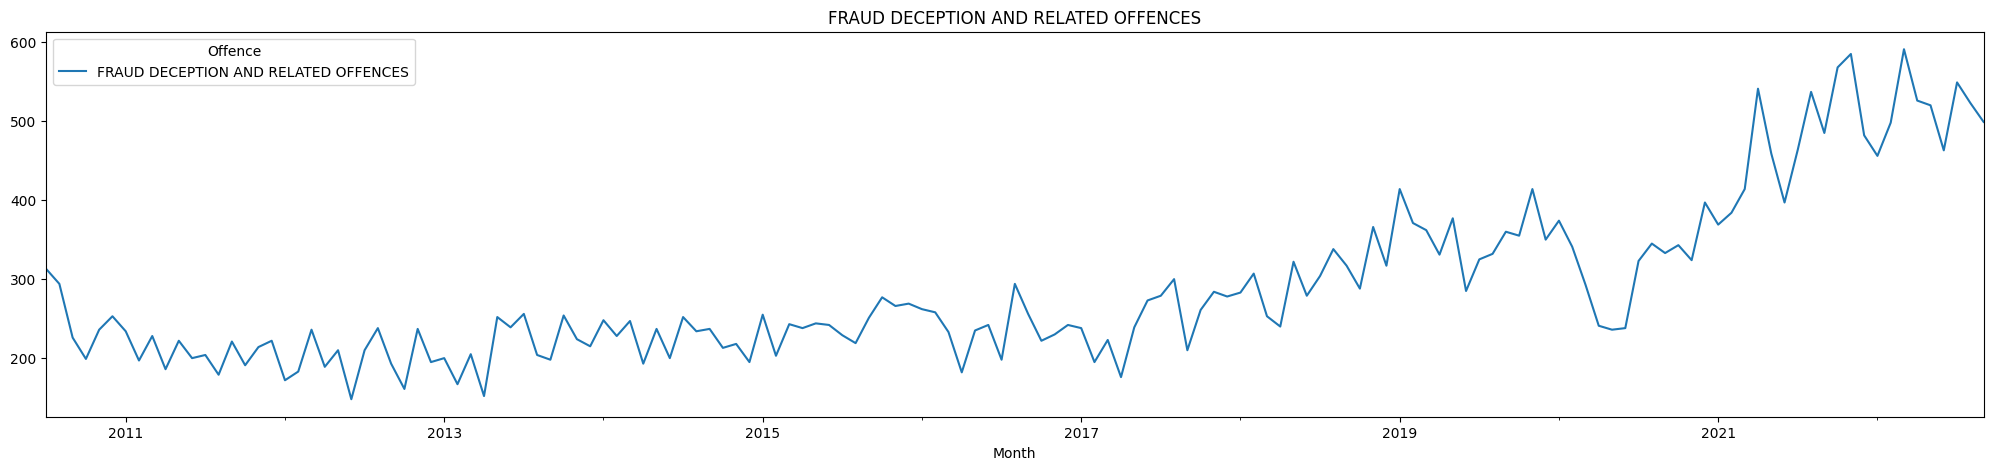

In [94]:
plt.figure()
pivot_df.plot(x="Month",y=['FRAUD DECEPTION AND RELATED OFFENCES'],figsize=(25, 5))
plt.title('FRAUD DECEPTION AND RELATED OFFENCES')
plt.show()


In [95]:
pivot_df.describe()

Offence,ACTS INTENDED TO CAUSE INJURY,FRAUD DECEPTION AND RELATED OFFENCES,HOMICIDE AND RELATED OFFENCES,OTHER OFFENCES AGAINST THE PERSON,PROPERTY DAMAGE AND ENVIRONMENTAL,ROBBERY AND RELATED OFFENCES,SERIOUS CRIMINAL TRESPASS,SEXUAL ASSAULT AND RELATED OFFENCES,THEFT AND RELATED OFFENCES
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,1440.775510,288.387755,4.571429,221.755102,2011.850340,61.380952,1314.204082,160.190476,3746.163265
std,145.942886,101.765003,2.796769,72.994238,381.008474,19.433883,211.823361,26.102625,465.888752
min,1118.000000,148.000000,0.000000,88.000000,1423.000000,28.000000,686.000000,109.000000,2757.000000
25%,1334.000000,221.500000,3.000000,151.500000,1737.000000,47.500000,1171.000000,141.500000,3451.000000
50%,1430.000000,252.000000,4.000000,236.000000,1887.000000,56.000000,1319.000000,157.000000,3686.000000
75%,1544.000000,332.500000,6.000000,285.500000,2181.000000,73.000000,1460.500000,178.000000,3961.000000
max,1812.000000,591.000000,15.000000,347.000000,3281.000000,135.000000,1730.000000,241.000000,5465.000000


In [96]:
rowsum = pivot_df.iloc[:,1:].sum(axis=0)
colsum = pivot_df.iloc[:,1:].sum(axis=1)


In [97]:
rowsum.sum()

1359644.0

In [98]:
df['Offence count'].sum()

1359644.0

In [100]:
##pivot_df.to_csv('Full.csv', index = False)

In [180]:
train_df = pivot_df.iloc[:142]
test_df = pivot_df.iloc[-3:]

In [181]:
train_df.set_index('Month', inplace=True)

In [182]:
test_df.set_index('Month', inplace=True)

In [183]:
train_df=train_df.rename_axis(None, axis = 1)
test_df=test_df.rename_axis(None, axis = 1)

In [184]:
test_df

,ACTS INTENDED TO CAUSE INJURY,FRAUD DECEPTION AND RELATED OFFENCES,HOMICIDE AND RELATED OFFENCES,OTHER OFFENCES AGAINST THE PERSON,PROPERTY DAMAGE AND ENVIRONMENTAL,ROBBERY AND RELATED OFFENCES,SERIOUS CRIMINAL TRESPASS,SEXUAL ASSAULT AND RELATED OFFENCES,THEFT AND RELATED OFFENCES
Month,,,,,,,,,
2022-07,1552.0,549.0,4.0,135.0,1724.0,78.0,987.0,201.0,4041.0
2022-08,1734.0,523.0,4.0,165.0,1655.0,84.0,937.0,229.0,4219.0
2022-09,1575.0,499.0,3.0,125.0,1733.0,70.0,873.0,211.0,4056.0


In [125]:
amount_of_features = len(train_df.columns)
amount_of_features

9

In [185]:
training_set = train_df.iloc[:, 1:2].values

In [186]:
testing_set = test_df.iloc[:, 1:2].values

In [187]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))  ##normalization##
training_set_scaled = sc.fit_transform(training_set)

In [188]:
print(len(training_set_scaled))

142


In [190]:
X = []
y = []
## 60 = how many ovservation for next day preddiction
## 135 = last index of training set
for i in range (3, 142):  
    X.append(training_set_scaled[i-3:i, 0]) ## i-3:i = rows, 0=column  [upper bound excluded]
    y.append(training_set_scaled[i, 0])
X, y = np.array(X_train), np.array(y_train)  #convert to numpy arrays from lists

In [191]:
X_train = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [193]:
X_train.shape

(139, 3, 1)

In [139]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [194]:
regressor = Sequential()

In [195]:
regressor.add(LSTM(units = 5, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 5, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 5, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 5))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [196]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [199]:
regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0131
Epoch 2/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 3/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 4/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0126
Epoch 5/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 6/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0170
Epoch 7/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 8/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 9/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 10/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 11/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 12/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 13/150
5/5 [==============================] - 0s 4ms/st

5/5 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 105/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 106/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 107/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0149
Epoch 108/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 109/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 110/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 111/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 112/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 113/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 114/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 115/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 116/150
5/5 [==============================] - 0

In [200]:
dataset_total = pd.concat((train_df['FRAUD DECEPTION AND RELATED OFFENCES'], test_df['FRAUD DECEPTION AND RELATED OFFENCES']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testing_set) - 3:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(3, 6):
    X_test.append(inputs[i-3:i, 0])
    y_test.append(inputs[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

1/1 [==============================] - 1s 791ms/step


In [201]:
predicted=np.trunc(predicted)

In [202]:
predicted

array([[509.],
       [523.],
       [512.]], dtype=float32)

In [203]:
testing_set

array([[549.],
       [523.],
       [499.]])

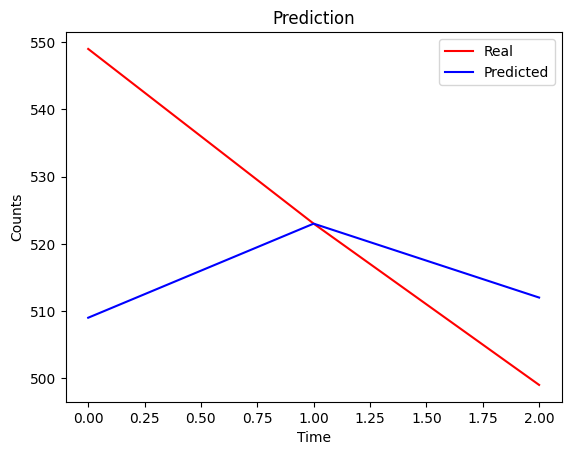

In [204]:
plt.plot(testing_set, color = 'red', label = 'Real')
plt.plot(predicted, color = 'blue', label = 'Predicted')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [205]:
fulltest=np.concatenate((training_set,testing_set), axis=0)
fullpredict=np.concatenate((training_set,predicted), axis=0)
fullpredict.shape

(145, 1)

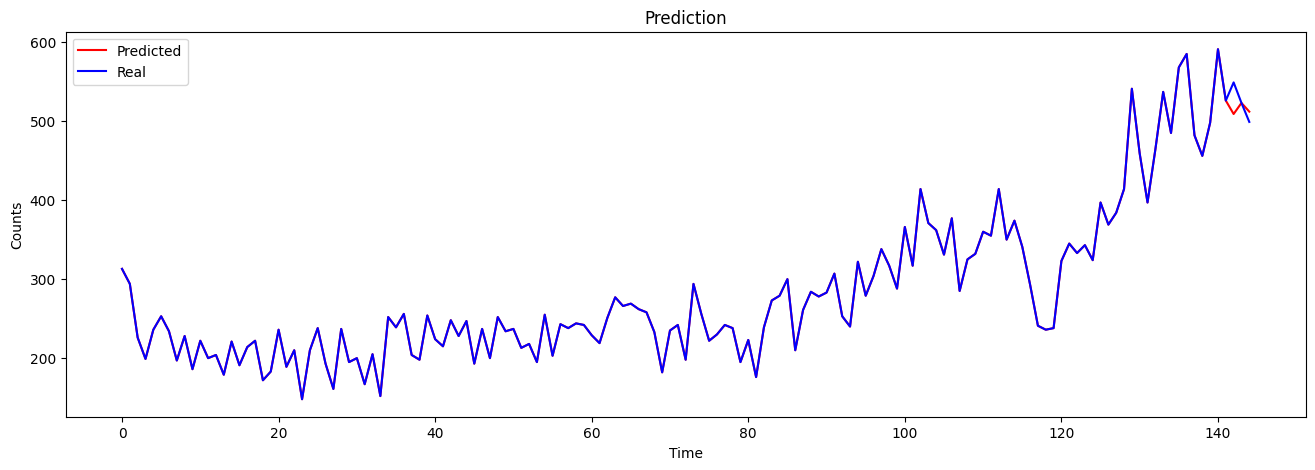

In [209]:
plt.figure(figsize=(16,5)) 
plt.plot(fullpredict, color = 'red', label = 'Predicted')
plt.plot(fulltest, color = 'blue', label = 'Real')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [223]:
X

array([[0.3724605 , 0.32957111, 0.17607223],
       [0.32957111, 0.17607223, 0.11512415],
       [0.17607223, 0.11512415, 0.1986456 ],
       [0.11512415, 0.1986456 , 0.23702032],
       [0.1986456 , 0.23702032, 0.19413093],
       [0.23702032, 0.19413093, 0.11060948],
       [0.19413093, 0.11060948, 0.18058691],
       [0.11060948, 0.18058691, 0.08577878],
       [0.18058691, 0.08577878, 0.16704289],
       [0.08577878, 0.16704289, 0.11738149],
       [0.16704289, 0.11738149, 0.12641084],
       [0.11738149, 0.12641084, 0.06997743],
       [0.12641084, 0.06997743, 0.16478555],
       [0.06997743, 0.16478555, 0.09706546],
       [0.16478555, 0.09706546, 0.1489842 ],
       [0.09706546, 0.1489842 , 0.16704289],
       [0.1489842 , 0.16704289, 0.05417607],
       [0.16704289, 0.05417607, 0.07900677],
       [0.05417607, 0.07900677, 0.1986456 ],
       [0.07900677, 0.1986456 , 0.09255079],
       [0.1986456 , 0.09255079, 0.13995485],
       [0.09255079, 0.13995485, 0.        ],
       [0.

In [224]:
X_ml=train_df.drop('FRAUD DECEPTION AND RELATED OFFENCES',axis=1)
Y_ml=train_df['FRAUD DECEPTION AND RELATED OFFENCES']

In [226]:
X_test_ml = test_df.drop('FRAUD DECEPTION AND RELATED OFFENCES',axis=1)
Y_test_ml = test_df['FRAUD DECEPTION AND RELATED OFFENCES']

In [231]:

from sklearn.linear_model import SGDRegressor

est =SGDRegressor()
est.fit(X_ml,Y_ml)
est.predict(X_test_ml)

array([-2.37712388e+16, -2.47793286e+16, -2.31999555e+16])